In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/ELCOT/Downloads/survey lung cancer.csv')
print(df.head(10))

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   
5      F   75        1               2        1              1   
6      M   52        2               1        1              1   
7      F   51        2               2        2              2   
8      F   68        2               1        2              1   
9      M   53        2               2        2              2   

   CHRONIC DISEASE  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2                  2         2   
1                2         1                  1         1   
2                1         2                  1         2   
3                1         1 

In [2]:
df.shape

(309, 14)

In [3]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'WHEEZING', 'ALCOHOL CONSUMING',
       'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY',
       'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   WHEEZING               309 non-null    int64 
 8   ALCOHOL CONSUMING      309 non-null    int64 
 9   COUGHING               309 non-null    int64 
 10  SHORTNESS OF BREATH    309 non-null    int64 
 11  SWALLOWING DIFFICULTY  309 non-null    int64 
 12  CHEST PAIN             309 non-null    int64 
 13  LUNG_CANCER            309 non-null    object
dtypes: int64(12), object(2)
memory usage: 33.9+ KB


In [5]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

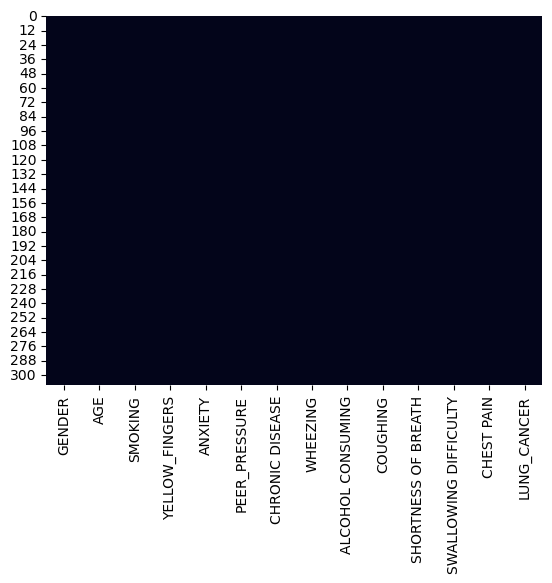

In [7]:
sns.heatmap(df.isnull(),cbar=False)

In [8]:
#find duplicate 
df.duplicated().sum()

35

In [9]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,62.927007,1.540146,1.576642,1.496350,1.507299,1.525547,1.547445,1.551095,1.576642,1.627737,1.467153,1.558394
std,8.368032,0.499298,0.494995,0.500902,0.500862,0.500261,0.498655,0.498293,0.494995,0.484292,0.499833,0.497487
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<AxesSubplot:title={'center':'BOx plot for AGE'}, xlabel='AGE'>

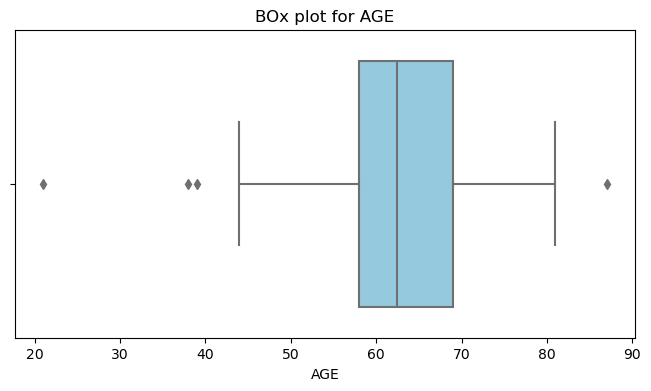

In [11]:
#box plot for determine outliers
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize=(8,4))
plt.title('BOx plot for AGE')
sns.boxplot(df['AGE'],color='skyblue')


In [12]:
upper_limit = df['AGE'].quantile(0.75)
lower_limit = df['AGE'].quantile(0.25)
print(upper_limit)
print(lower_limit)

69.0
58.0


In [13]:
#remove outliers
df=df[(df['AGE'] <= 69.0) & (df['AGE'] >= 57.0)]

<AxesSubplot:title={'center':'Box plot for AGE'}, xlabel='AGE'>

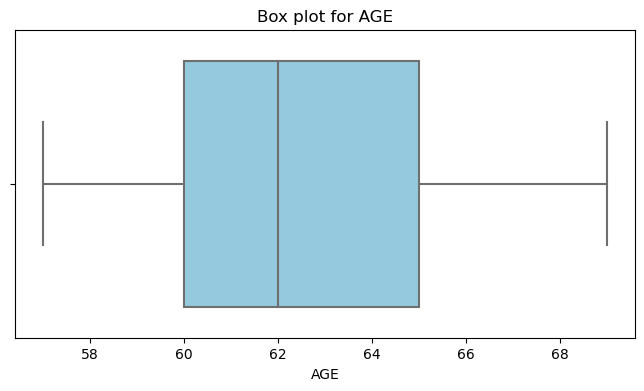

In [14]:
plt.figure(figsize=(8,4))
plt.title('Box plot for AGE')
sns.boxplot(df['AGE'],color='skyblue')

<AxesSubplot:title={'center':'Relationship Between variables'}>

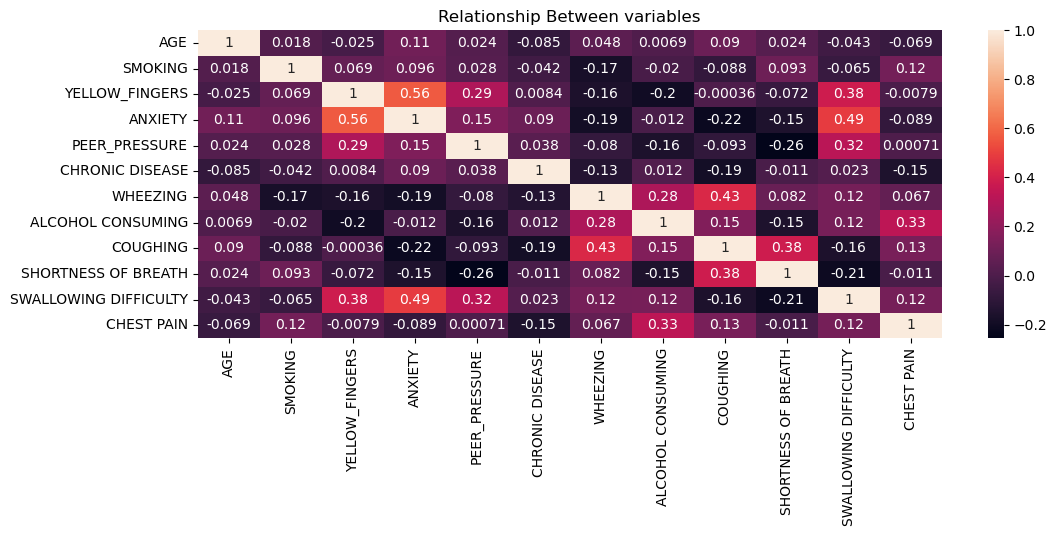

In [15]:
#Relationship between Variables 
plt.figure(figsize=(12,4))
plt.title('Relationship Between variables')
sns.heatmap(df.corr(),annot=True)


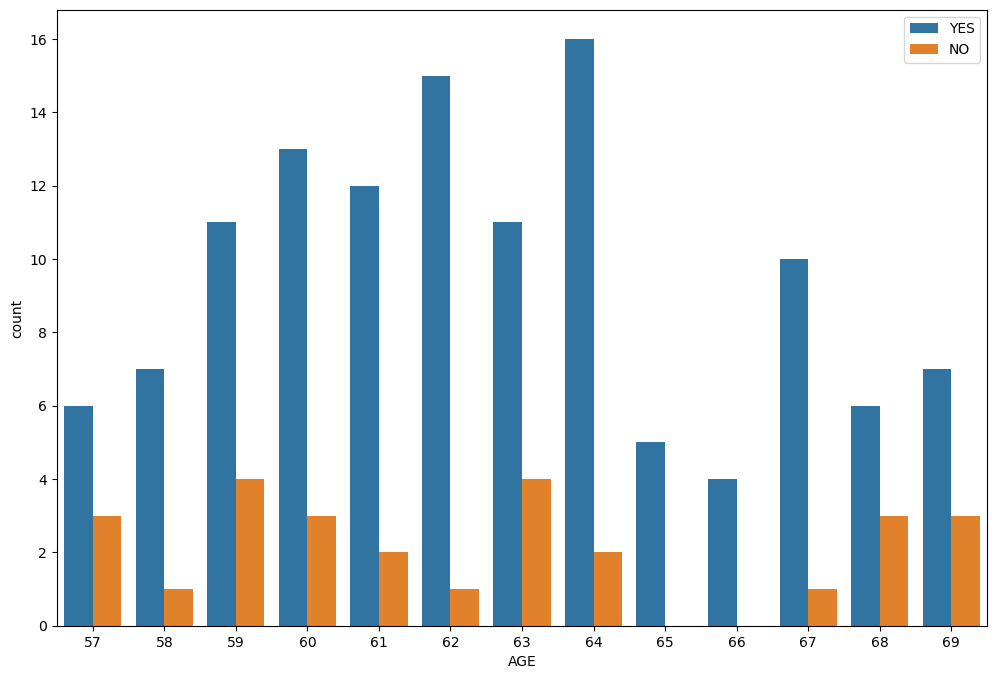

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='AGE',hue='LUNG_CANCER')
plt.legend(loc='upper right')

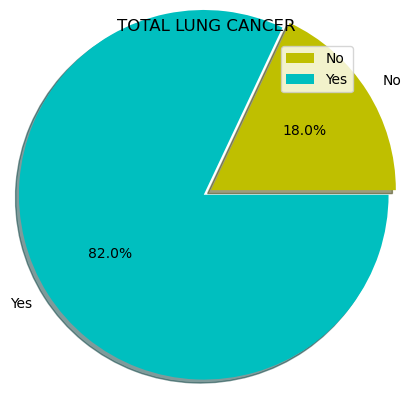

In [17]:
r = df.groupby('LUNG_CANCER')['LUNG_CANCER'].count()
plt.figure(figsize=(8,4))

plt.pie(r, explode=[0.05,0.02], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True,colors=['y','c'])
plt.title('TOTAL LUNG CANCER')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Female')

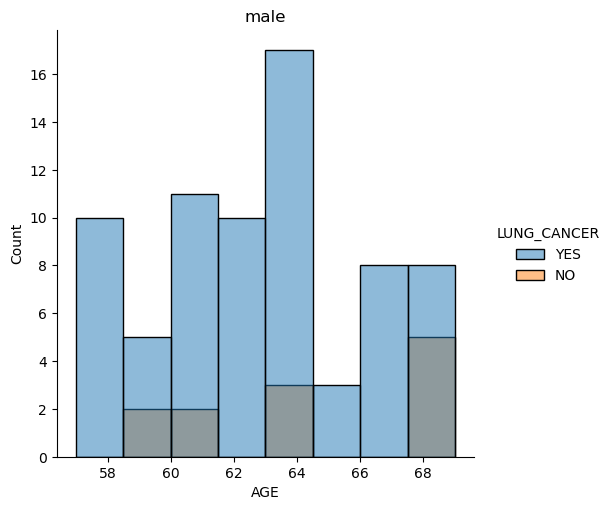

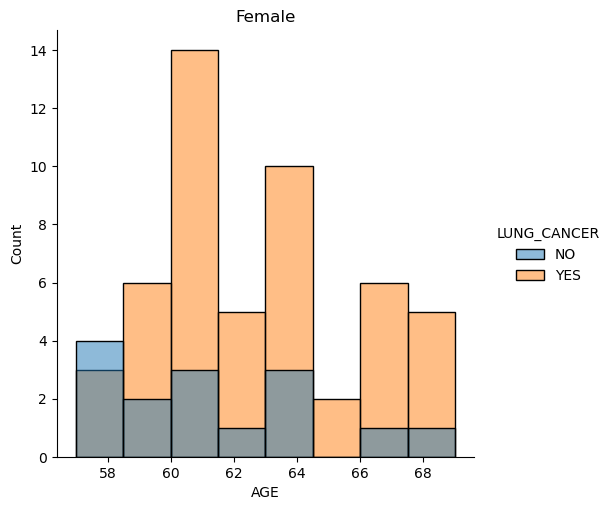

In [18]:
sns.displot(x='AGE',data=df[df['GENDER']=='M'],hue='LUNG_CANCER')
plt.title('male')

sns.displot(x='AGE',data=df[df['GENDER']=='F'],hue='LUNG_CANCER')
plt.title('Female')

In [19]:
df_c_f = df[(df['LUNG_CANCER']=='YES') & (df['GENDER']=='F') ]
df_c_m = df[(df['LUNG_CANCER']=='YES') & (df['GENDER']=='M') ]
print(df_c_f)
print(df_c_m)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
10       F   61        2               2        2              2   
18       F   68        2               2        2              2   
21       F   64        1               2        2              2   
26       F   61        2               2        2              1   
33       F   67        2               2        2              1   
35       F   59        2               2        2              1   
47       F   64        2               2        1              2   
54       F   57        1               2        1              2   
56       F   63        1               2        1              2   
63       F   68        1               1        2              1   
71       F   66        2               2        2              2   
73       F   60        2               1        1              1   
82       F   62        2               2        2              2   
88       F   62        2               2        

In [20]:
df.groupby(["SMOKING","LUNG_CANCER",]).agg(Total=("SMOKING","count"))

Total
SMOKING LUNG_CANCER       
1       NO              15
        YES             54
2       NO              12
        YES             69

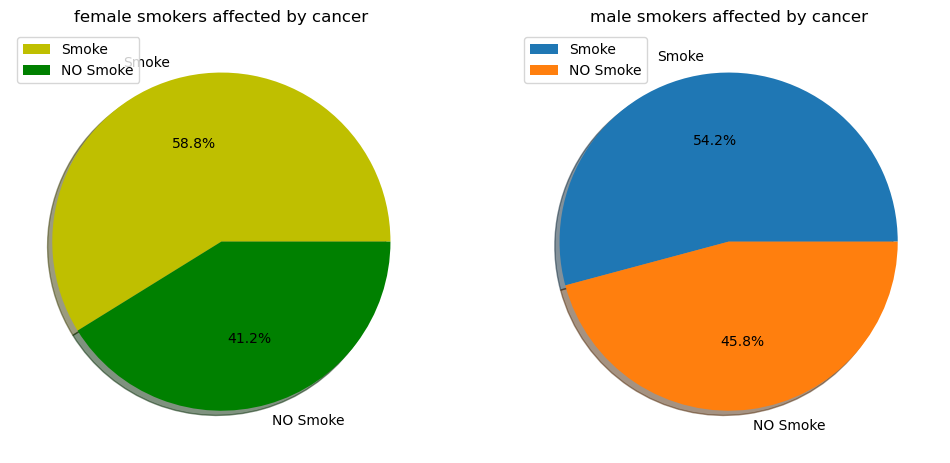

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
data_1 = df_c_f['SMOKING'].value_counts().values

plt.pie(data_1,labels=['Smoke','NO Smoke'],autopct='%2.1f%%',shadow=True,colors=['y','g'])
plt.title('female smokers affected by cancer')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
data_2 = df_c_m['SMOKING'].value_counts().values

plt.pie(data_2,labels=['Smoke','NO Smoke'],autopct='%2.1f%%',shadow=True)
plt.title('male smokers affected by cancer')
plt.legend(loc='upper left')

In [22]:
df.groupby(["ALCOHOL CONSUMING","LUNG_CANCER"]).agg(Total=("LUNG_CANCER","count"))

Total
ALCOHOL CONSUMING LUNG_CANCER       
1                 NO              21
                  YES             48
2                 NO               6
                  YES             75

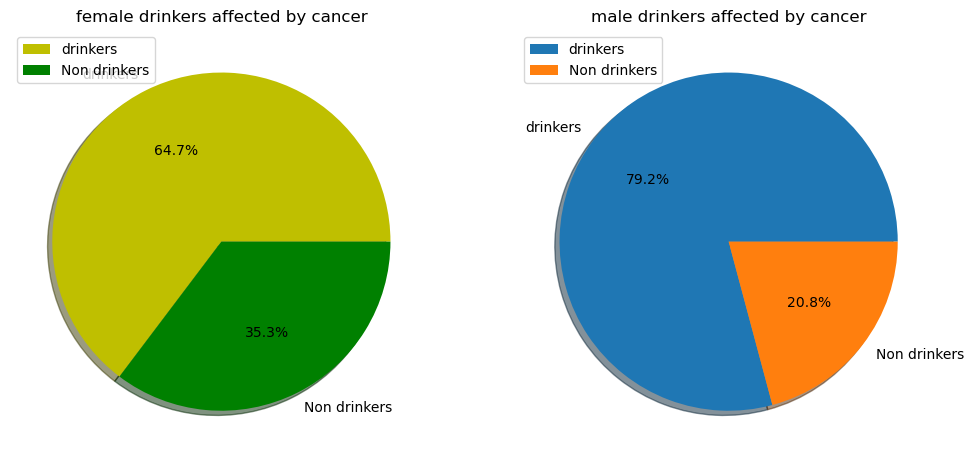

In [24]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
data_1 = df_c_f['ALCOHOL CONSUMING'].value_counts().values

plt.pie(data_1,labels=['drinkers','Non drinkers'],autopct='%2.1f%%',shadow=True,colors=['y','g'])
plt.title('female drinkers affected by cancer')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
data_2 = df_c_m['ALCOHOL CONSUMING'].value_counts().values

plt.pie(data_2,labels=['drinkers','Non drinkers'],autopct='%2.1f%%',shadow=True)
plt.title('male drinkers affected by cancer')
plt.legend(loc='upper left')

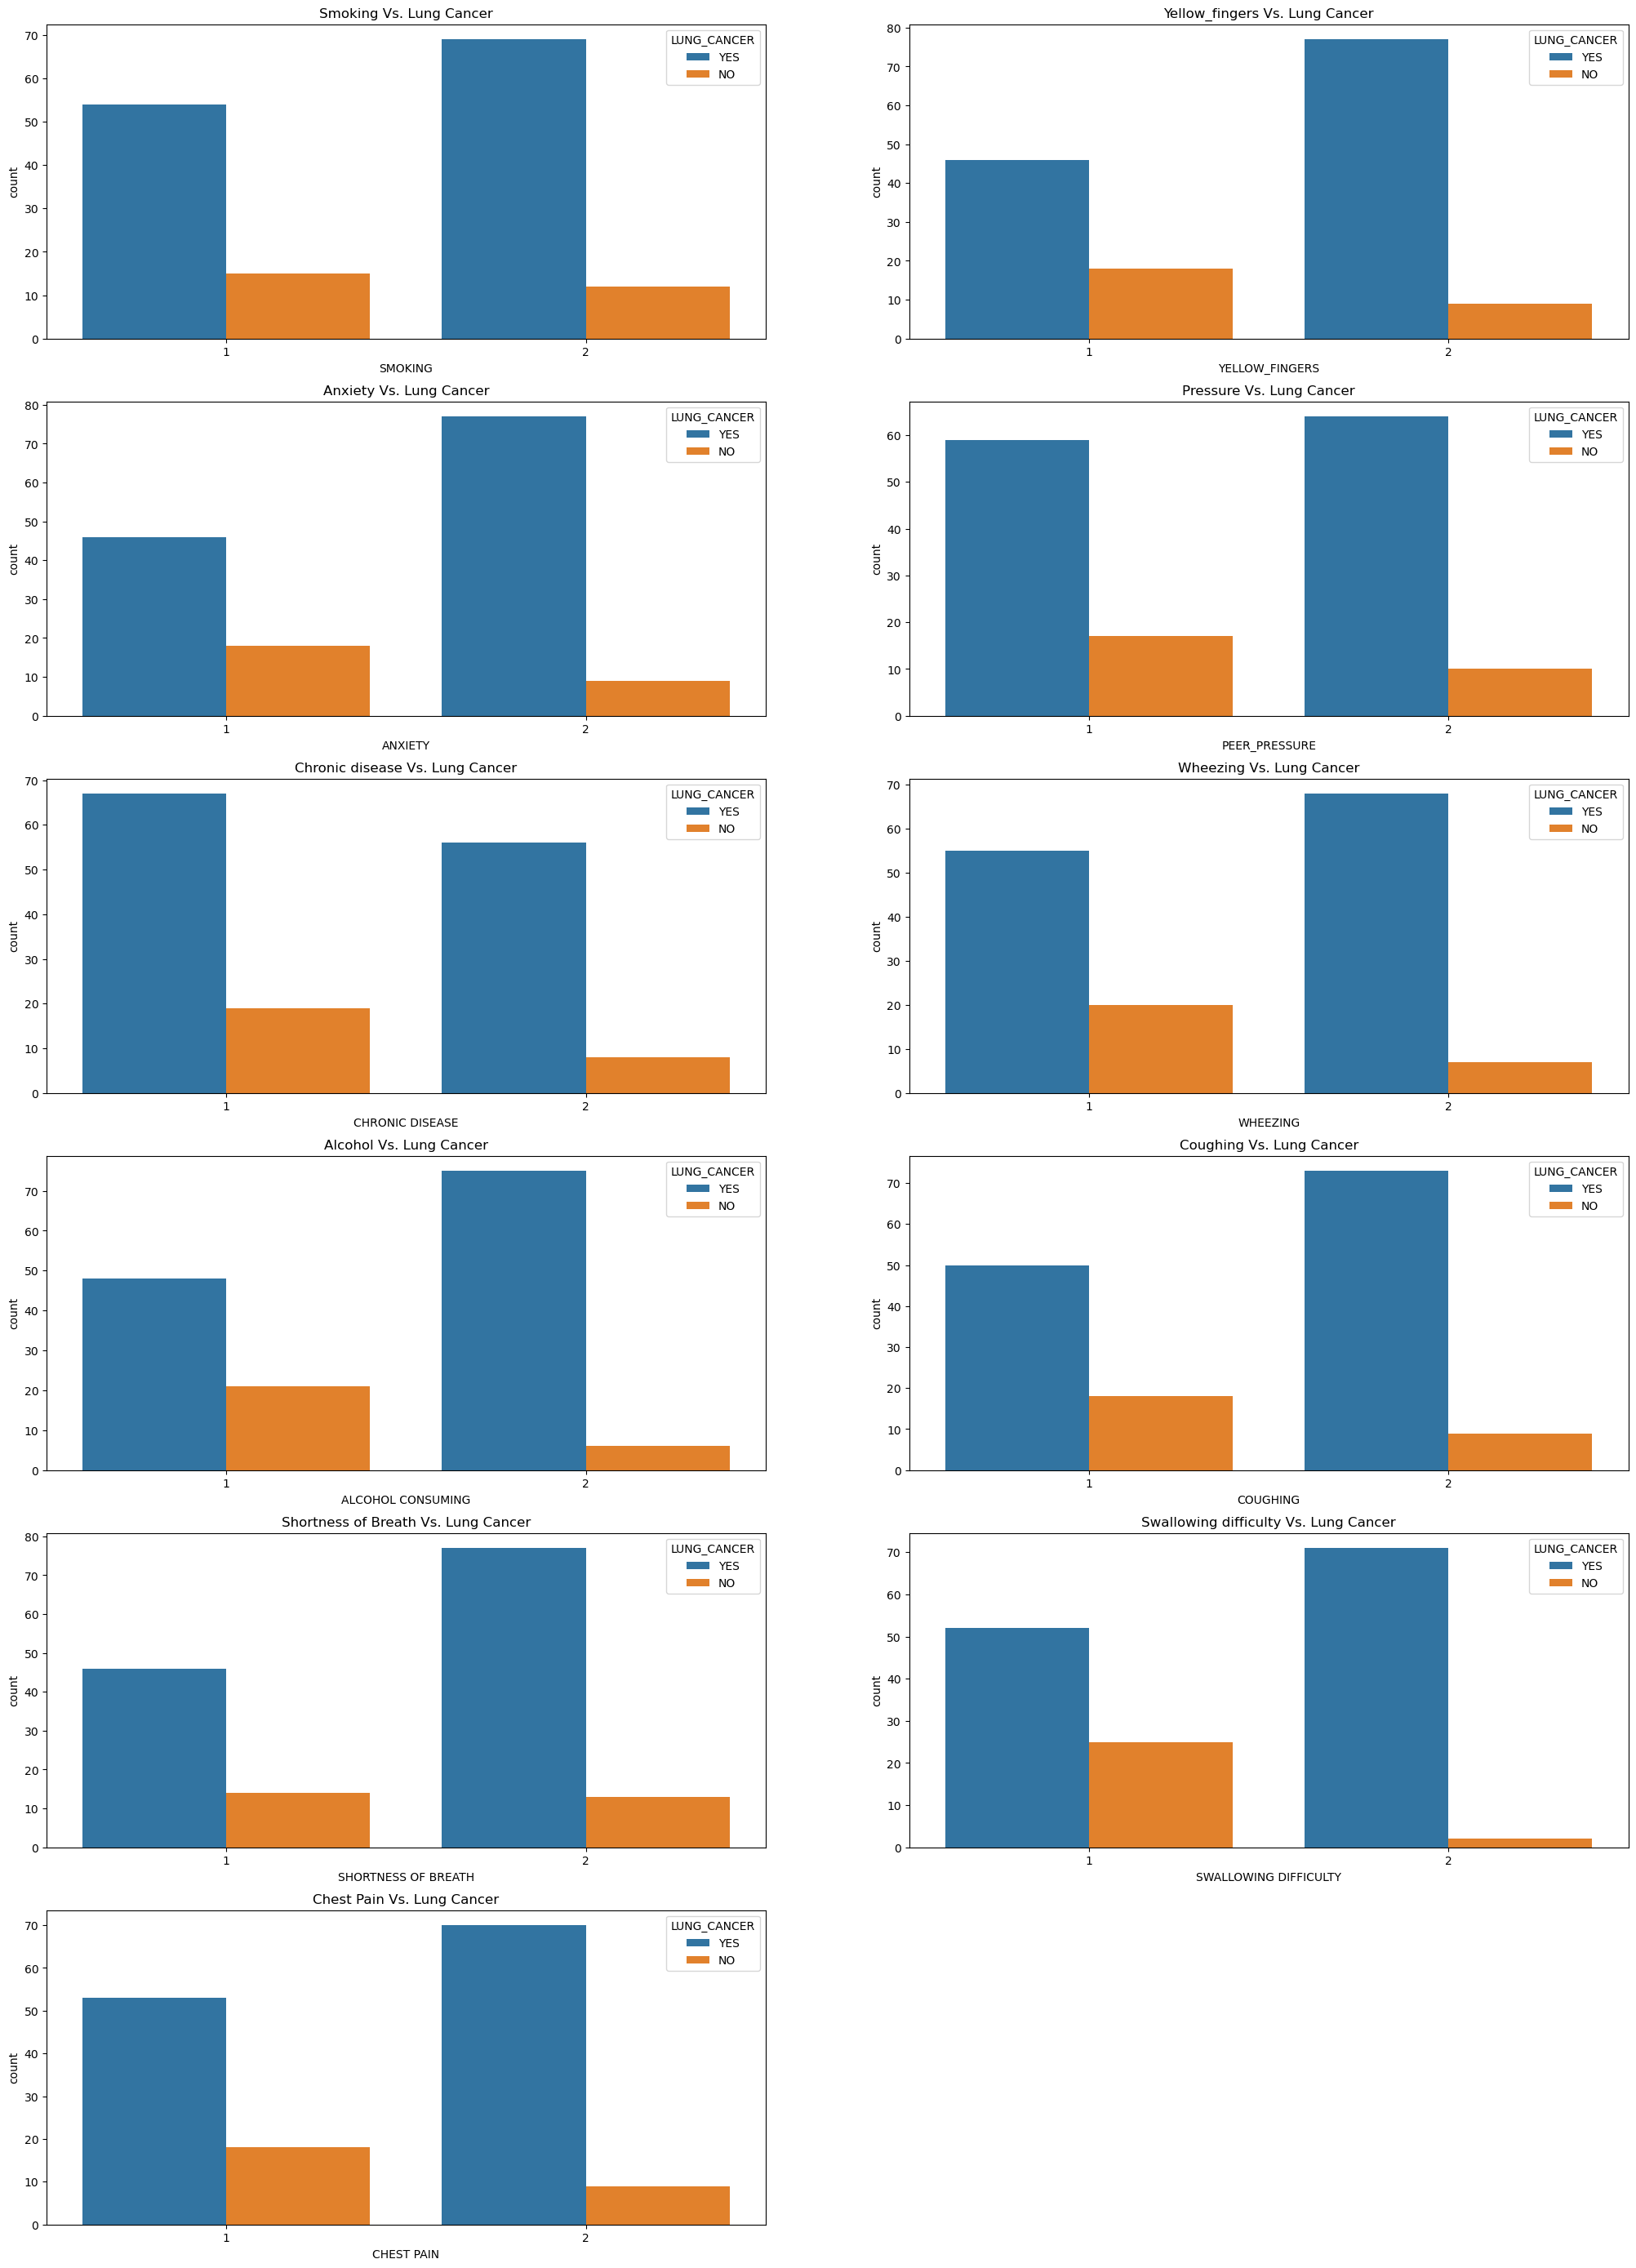

In [25]:
plt.figure(figsize=(25,35))
plt.subplot(6,2,1)
plt.title("Smoking Vs. Lung Cancer")
sns.countplot(data=df,x="SMOKING",hue="LUNG_CANCER")
plt.subplot(6,2,2)
plt.title("Yellow_fingers Vs. Lung Cancer")
sns.countplot(data=df,x="YELLOW_FINGERS",hue="LUNG_CANCER")
plt.subplot(6,2,3)
plt.title("Anxiety Vs. Lung Cancer")
sns.countplot(data=df,x="ANXIETY",hue="LUNG_CANCER")
plt.subplot(6,2,4)
plt.title("Pressure Vs. Lung Cancer")
sns.countplot(data=df,x="PEER_PRESSURE",hue="LUNG_CANCER")
plt.subplot(6,2,5)
plt.title("Chronic disease Vs. Lung Cancer")
sns.countplot(data=df,x="CHRONIC DISEASE",hue="LUNG_CANCER")
plt.subplot(6,2,6)
plt.title("Wheezing Vs. Lung Cancer")
sns.countplot(data=df,x="WHEEZING",hue="LUNG_CANCER")
plt.subplot(6,2,7)
plt.title("Alcohol Vs. Lung Cancer")
sns.countplot(data=df,x="ALCOHOL CONSUMING",hue="LUNG_CANCER")
plt.subplot(6,2,8)
plt.title("Coughing Vs. Lung Cancer")
sns.countplot(data=df,x="COUGHING",hue="LUNG_CANCER")
plt.subplot(6,2,9)
plt.title("Shortness of Breath Vs. Lung Cancer")
sns.countplot(data=df,x="SHORTNESS OF BREATH",hue="LUNG_CANCER")
plt.subplot(6,2,10)
plt.title("Swallowing difficulty Vs. Lung Cancer")
sns.countplot(data=df,x="SWALLOWING DIFFICULTY",hue="LUNG_CANCER")
plt.subplot(6,2,11)
plt.title("Chest Pain Vs. Lung Cancer")
sns.countplot(data=df,x="CHEST PAIN",hue="LUNG_CANCER")
plt.show()












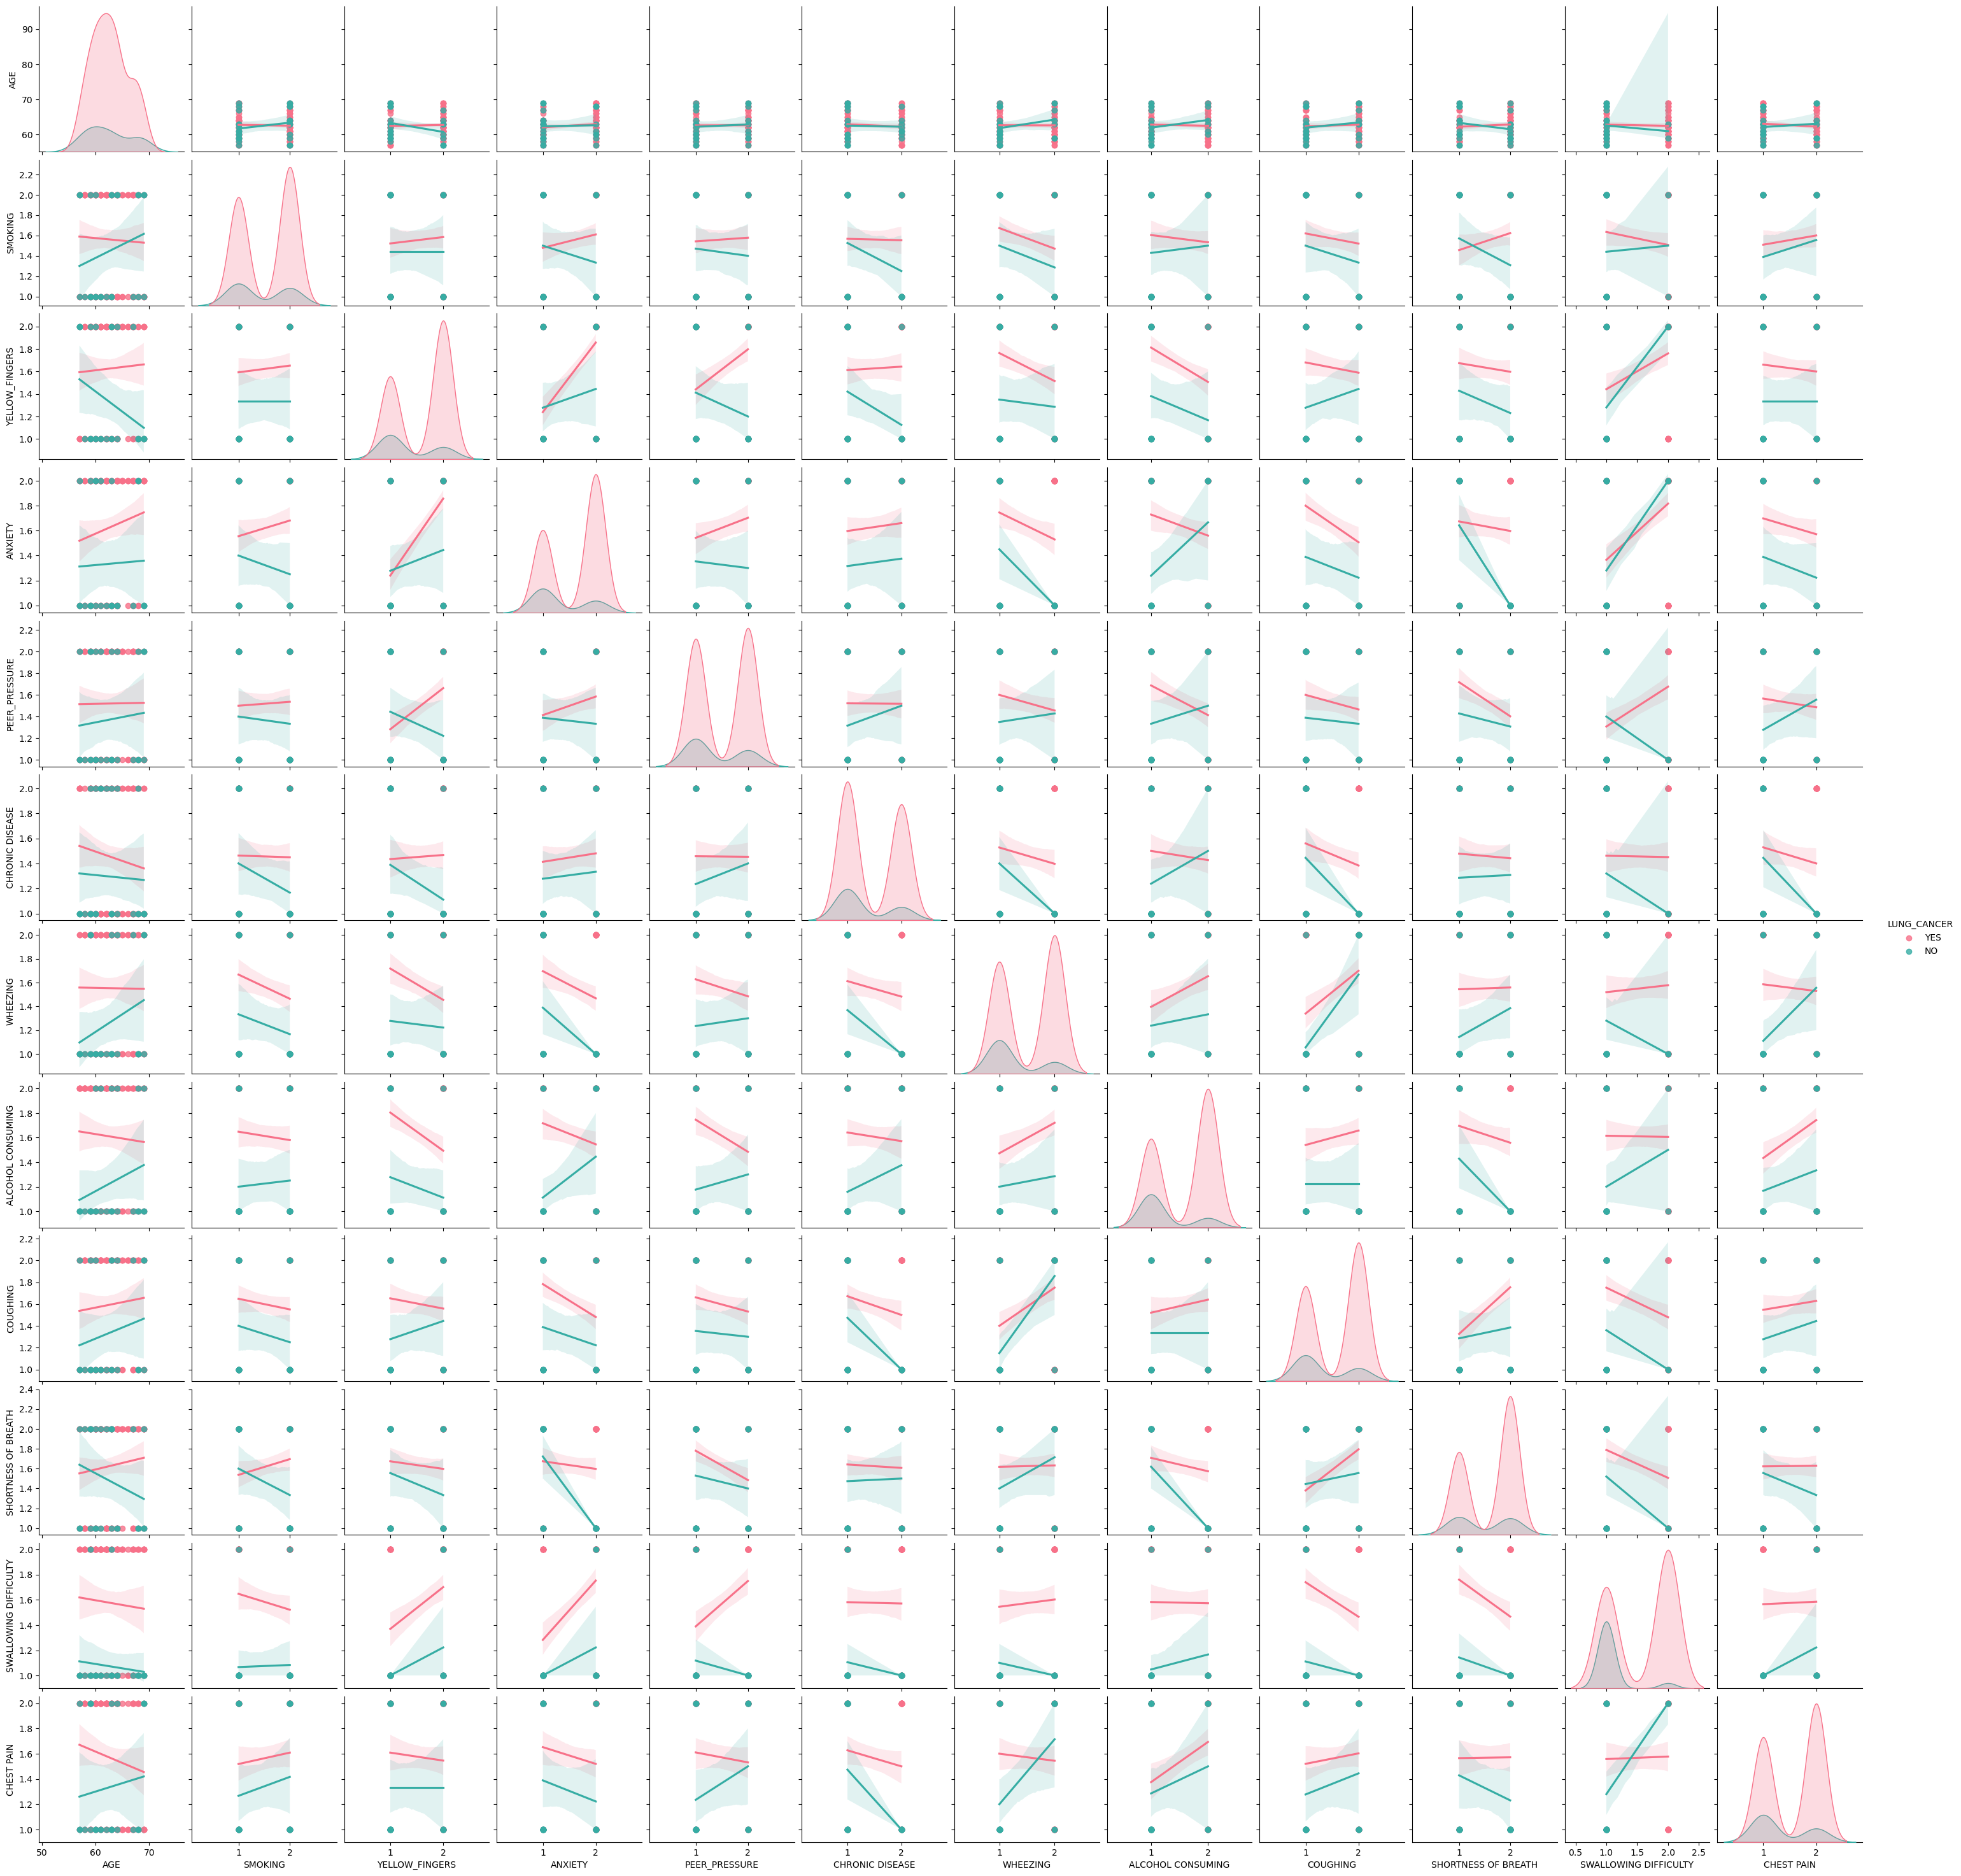

In [76]:

sns.pairplot(df,hue='LUNG_CANCER',palette='husl',diag_kind='kde',kind='reg')


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
df.GENDER.replace({"M":1,"F":0},inplace=True)
df.LUNG_CANCER.replace({"YES":1,"NO":0},inplace=True)


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('LUNG_CANCER',axis=1)
y = df['LUNG_CANCER']
print(X.shape)
print(y.shape)

(150, 13)
(150,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
log_reg=LogisticRegression()

In [33]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
log_reg.fit(X_train,y_train)

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
predictions_log_reg = log_reg.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix- Logistic Regression')

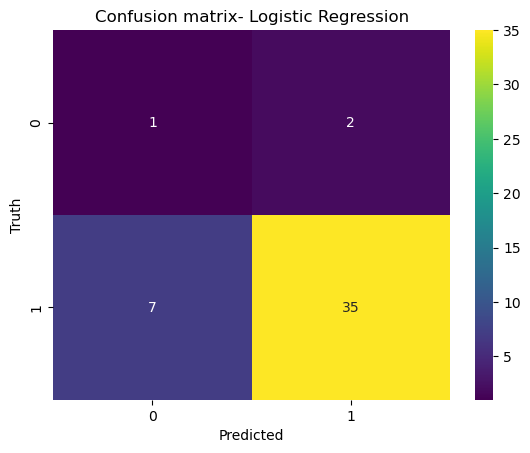

In [36]:
sns.heatmap(confusion_matrix(y_test,predictions_log_reg),annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion matrix- Logistic Regression")